## Clustering,ANN and Text Mining 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# to make this notebook's output stable across runs


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('score_dataset.csv',sep=',')
df.drop('Serial No.',axis = 1,inplace = True)
df.columns = ['GRE', 'TOEFL', 'University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
np.random.seed(0)
df_explore = df.copy()

In [3]:
df_explore.shape

(500, 8)

In [4]:
df_explore.dtypes

GRE                    int64
TOEFL                  int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
df_explore.sample(10, random_state=0)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
90,318,106,2,4.0,4.0,7.92,1,0.64
254,321,114,4,4.0,5.0,9.12,0,0.85
283,321,111,3,2.5,3.0,8.90,1,0.80
445,328,116,5,4.5,5.0,9.08,1,0.91
461,301,102,3,2.5,2.0,8.13,1,0.68
15,314,105,3,3.5,2.5,8.30,0,0.54
316,298,101,2,1.5,2.0,7.86,0,0.54
489,302,110,3,4.0,4.5,8.50,0,0.65
159,297,100,1,1.5,2.0,7.90,0,0.52
153,324,105,3,3.0,4.0,8.75,0,0.79


### Missing Values 

In [6]:

df_explore=df_explore.replace('?',np.nan)
print('Number of instances=%d'%(df_explore.shape[0]))
print('Number of attributes=%d'%(df_explore.shape[1]))

print('Number pf missing values:')
for column in df_explore.columns:
    print('\t%s: %d'%(column,df_explore[column].isna().sum()))

Number of instances=500
Number of attributes=8
Number pf missing values:
	GRE: 0
	TOEFL: 0
	University Rating: 0
	SOP: 0
	LOR: 0
	CGPA: 0
	Research: 0
	Chance of Admit: 0


In [7]:
dep_var = ['Chance of Admit']

categorical_vars = ['Research']

discrete_vars = ['GRE','TOEFL','University Rating']

continuous_vars = ['SOP','LOR','CGPA']

### Categorical Values

In [9]:
for i in categorical_vars:
    print(df_explore[i].value_counts())
    print()

1    280
0    220
Name: Research, dtype: int64



In [10]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE                  500 non-null int64
TOEFL                500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [11]:
dataset=df.copy()

In [12]:
print(dataset.shape)
dataset.describe()

(500, 8)


,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Correlation Analysis 

In [14]:
dataset.corr(method="pearson")

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Text(0.5, 1, 'Pearsons Correlation Factors Heat Map')

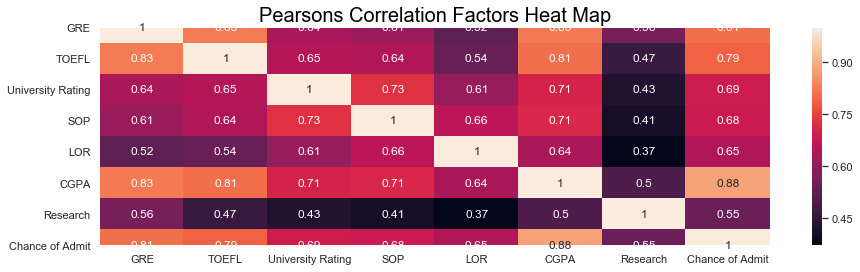

In [15]:
corr = dataset.corr() #saving the correlation for later use
ax = sns.set(rc={'figure.figsize':(15,4)})
sns.heatmap(corr, annot=True).set_title('Pearsons Correlation Factors Heat Map', color='black', size='20')

### Analysing the Chance of Admit if gre and toefl are greater that 85 percent

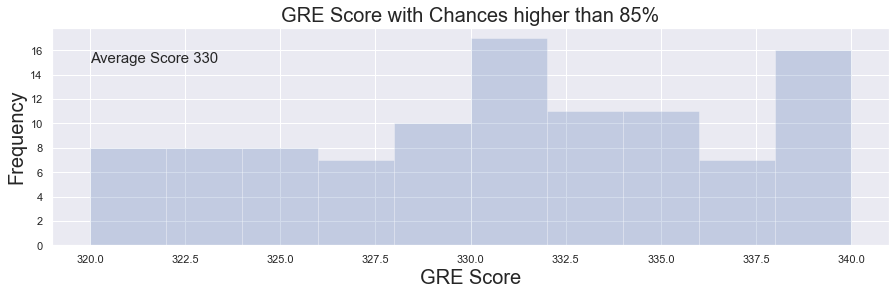

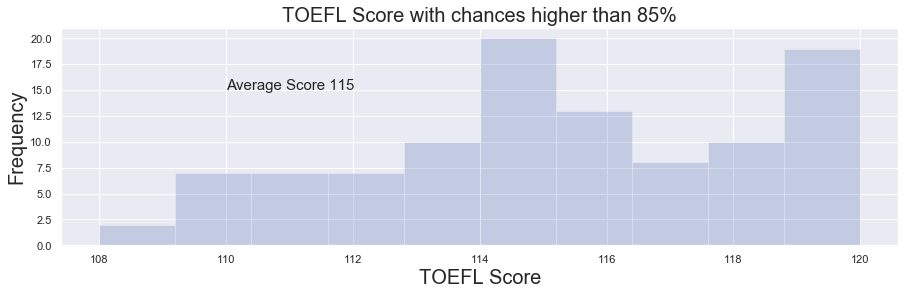

In [16]:
dataset[dataset['Chance of Admit'] > 0.85]['GRE'].plot(kind = 'hist',x = 'GRE',alpha = 0.25)
plt.text(320, 15, 'Average Score %d' %(int(np.mean(dataset[dataset['Chance of Admit'] > 0.85]['GRE']))), fontsize=15)
plt.xlabel('GRE Score',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('GRE Score with Chances higher than 85%',fontsize = 20)
plt.show()

dataset[dataset['Chance of Admit'] > 0.85]['TOEFL'].plot(kind = 'hist',x = 'TOEFL',alpha = 0.25)
plt.text(110, 15, 'Average Score %d' %(int(np.mean(dataset[dataset['Chance of Admit'] > 0.85]['TOEFL']))), fontsize=15)
plt.xlabel('TOEFL Score',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('TOEFL Score with chances higher than 85%',fontsize = 20)
plt.show()

#### University Ratings values

In [17]:
dataset['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

### The chance of admit if university rating is 4 and have done research

In [18]:
dataset[(dataset['University Rating'] >= 4) & (dataset['Research'] == 1)].sort_values(by = ['Chance of Admit']).head(5)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
492,298,101,4,2.5,4.5,7.69,1,0.53
412,314,102,4,2.5,2.0,7.88,1,0.59
406,322,103,4,3.0,2.5,8.02,1,0.61
115,310,106,4,4.5,4.5,9.04,1,0.66
474,308,105,4,3.0,2.5,7.95,1,0.67


#### Analysis on LOR and SOP - finding average value

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE                  500 non-null int64
TOEFL                500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## KMeans Clustering

In [28]:
data_df=dataset

In [29]:
from sklearn import cluster

#data = data_df.drop('',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data_df) 
labels = k_means.labels_
pd.DataFrame(labels, index=dataset.SOP, columns=['Cluster ID'])

,Cluster ID
SOP,
4.5,1
4.0,1
3.0,0
3.5,1
2.0,0
...,...
4.5,1
5.0,1
4.5,1


In [31]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data_df.columns)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,307.766917,102.898496,2.477444,2.860902,3.080827,8.167895,0.293233,0.628910
1,326.367521,112.072650,3.837607,3.957265,3.942308,9.040855,0.863248,0.827265


### Splitting dataset

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(data_df[['GRE', 'TOEFL', 'University Rating']], data_df['CGPA'], test_size=0.20, random_state=42)


In [34]:
x_test.shape

(100, 3)

In [35]:
x_test

,GRE,TOEFL,University Rating
361,334,116,4
73,314,108,4
374,315,105,2
155,312,109,3
104,326,112,3
...,...,...,...
347,299,94,1
86,315,106,3
75,329,114,2
438,318,110,1


In [ ]:
import numpy as np

#testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(x_test)
labels = labels.reshape(-1,1)
usernames = np.array(['']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

Text(0, 0.5, 'SSE')

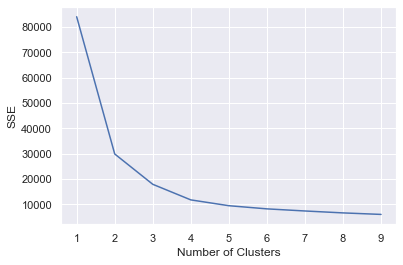

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6,7,8,9]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(dataset)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Hierarchical Clustering

In [37]:
dataset.head(5)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


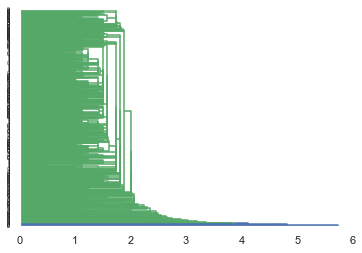

In [40]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = dataset['Research']
Y = dataset['CGPA']
X = dataset.drop(['Research','CGPA'],axis=1)
Z = hierarchy.linkage(X.as_matrix(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

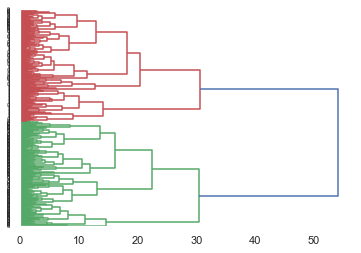

In [41]:
Z = hierarchy.linkage(X.as_matrix(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

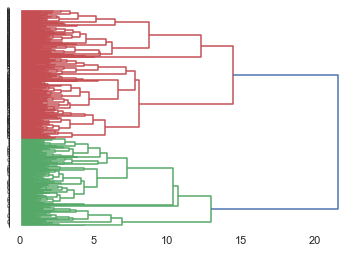

In [42]:
Z = hierarchy.linkage(X.as_matrix(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## ANN

In [43]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

Using TensorFlow backend.


In [44]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [65]:
df = pd.read_csv('score_dataset.csv',header='infer')

In [66]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [67]:
Classes = encode_text_index(df,'Research')

In [68]:
Classes

array([0, 1], dtype=int64)

In [69]:
X,Y = to_xy(df,'Research')
testX, testY = to_xy(df,'Research')

In [71]:
X

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   9.65,   0.92],
       [  2.  , 324.  , 107.  , ...,   4.5 ,   8.87,   0.76],
       [  3.  , 316.  , 104.  , ...,   3.5 ,   8.  ,   0.72],
       ...,
       [498.  , 330.  , 120.  , ...,   5.  ,   9.56,   0.93],
       [499.  , 312.  , 103.  , ...,   5.  ,   8.43,   0.73],
       [500.  , 327.  , 113.  , ...,   4.5 ,   9.04,   0.84]],
      dtype=float32)

In [72]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

### Binarization

In [70]:
from sklearn.preprocessing import Binarizer

In [80]:
transformer = Binarizer().fit(X) 

In [81]:
X=transformer.transform(X)

In [82]:
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [83]:
print(X.shape)
print(Y.shape)


(500, 8)
(500, 2)


In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1]))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model.fit(X, Y, epochs=10)

Epoch 1/10
500/500 [==============================] - 0s 909us/step - loss: 0.7703 - accuracy: 0.4400
Epoch 2/10
500/500 [==============================] - 0s 87us/step - loss: 0.6965 - accuracy: 0.4840
Epoch 3/10
500/500 [==============================] - 0s 78us/step - loss: 0.6867 - accuracy: 0.5600
Epoch 4/10
500/500 [==============================] - 0s 66us/step - loss: 0.6880 - accuracy: 0.5600
Epoch 5/10
500/500 [==============================] - 0s 74us/step - loss: 0.6874 - accuracy: 0.5600
Epoch 6/10
500/500 [==============================] - 0s 60us/step - loss: 0.6880 - accuracy: 0.5600
Epoch 7/10
500/500 [==============================] - 0s 62us/step - loss: 0.6871 - accuracy: 0.5600
Epoch 8/10
500/500 [==============================] - 0s 62us/step - loss: 0.6865 - accuracy: 0.5600
Epoch 9/10
500/500 [==============================] - 0s 62us/step - loss: 0.6890 - accuracy: 0.5600
Epoch 10/10
500/500 [==============================] - 0s 60us/step - loss: 0.6877 - accur

In [88]:
pred = model.predict(testX)
pred

array([[9.98738110e-01, 1.26195792e-03],
       [9.94191706e-01, 5.80829522e-03],
       [9.92538631e-01, 7.46134948e-03],
       [9.96453762e-01, 3.54624516e-03],
       [9.85321820e-01, 1.46782137e-02],
       [9.97840643e-01, 2.15934636e-03],
       [9.91282821e-01, 8.71721655e-03],
       [9.65329468e-01, 3.46705019e-02],
       [9.80319440e-01, 1.96805242e-02],
       [9.84535515e-01, 1.54645182e-02],
       [9.64340746e-01, 3.56592573e-02],
       [9.79158342e-01, 2.08416693e-02],
       [9.78490293e-01, 2.15097405e-02],
       [9.86521244e-01, 1.34787308e-02],
       [9.59291518e-01, 4.07084413e-02],
       [9.49897110e-01, 5.01028337e-02],
       [9.39604580e-01, 6.03954755e-02],
       [9.23269749e-01, 7.67302737e-02],
       [9.47755575e-01, 5.22444509e-02],
       [8.60578060e-01, 1.39422014e-01],
       [9.33800578e-01, 6.61994144e-02],
       [9.68694210e-01, 3.13058458e-02],
       [9.36404169e-01, 6.35958463e-02],
       [9.48217928e-01, 5.17821163e-02],
       [9.445616

In [89]:
pred = np.argmax(pred, axis=1)

In [90]:
true = np.argmax(testY, axis=1)

In [91]:
Classes[pred]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [92]:
Classes[true]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report


print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.54


In [94]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       0.36      0.05      0.08       220
           1       0.56      0.94      0.70       280

    accuracy                           0.54       500
   macro avg       0.46      0.49      0.39       500
weighted avg       0.47      0.54      0.43       500



## Text Mining

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time


from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [99]:
txt = ["This is :: a pleasent day, for playing with friends",
       "he, unlike most of them, is a better person to hang out with.",
       "she can't be going this to me"]

In [100]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['better', 'day', 'friends', 'going', 'hang', 'person', 'playing', 'pleasent', 'unlike']

Every 3rd feature:
['better', 'going', 'playing']


In [101]:
print(" size: {}".format(len(count_train.vocabulary_)))
print(" content:\n {}".format(count_train.vocabulary_))

 size: 9
 content:
 {'pleasent': 7, 'day': 1, 'playing': 6, 'friends': 2, 'unlike': 8, 'better': 0, 'person': 5, 'hang': 4, 'going': 3}


In [104]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['better', 'better person', 'day', 'day playing', 'friends', 'going', 'hang', 'person', 'person hang', 'playing', 'playing friends', 'pleasent', 'pleasent day', 'unlike', 'unlike better']


In [106]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['better', 'better person', 'better person hang', 'day', 'day playing', 'day playing friends', 'friends', 'going', 'hang', 'person', 'person hang', 'playing', 'playing friends', 'pleasent', 'pleasent day', 'pleasent day playing', 'unlike', 'unlike better', 'unlike better person']


In [109]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=0.50, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())


['better', 'day', 'friends', 'going', 'hang', 'person', 'playing', 'pleasent', 'unlike']

Only 'park' is ignored because it appears in 2 out of 3 documents, meaning 0.66% of the time.


In [110]:
#maxfeatures
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=4)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['better', 'day', 'friends', 'going']


In [129]:
#tfidf
txt1 = ['Hi  a good day', ' not a good time','good']
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(txt1)
txt_transformed = txt_fitted.transform(txt1)
print ("The text: ", txt1)

The text:  ['Hi  a good day', ' not a good time', 'good']


In [130]:
tf.vocabulary_

{'hi': 2, 'good': 1, 'day': 0, 'not': 3, 'time': 4}

In [131]:
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))



{'day': 2.09861228866811, 'good': 1.0, 'hi': 2.09861228866811, 'not': 2.09861228866811, 'time': 2.09861228866811}


In [132]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))

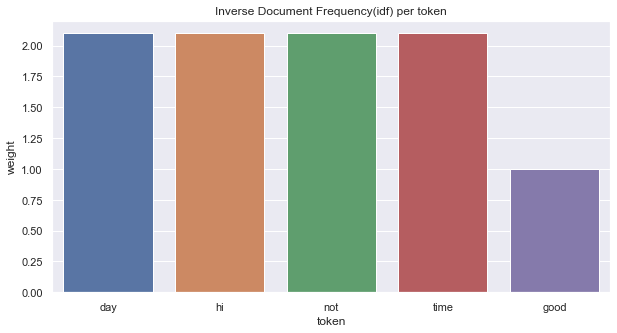

In [133]:
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 

sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

Let us compute the tf-idf
Term Frequency = tf
Inverse Document Frequency = idf
idf = log(total_docs/number of documents that contain the word)

tf-idf = tf . idf

In [134]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['good' 'day' 'hi']

Features with highest idf:
['hi' 'not' 'time']


In [135]:
print("The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1\
 its weight is 0 because it does not appear there.")
txt_transformed.toarray()

The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1 its weight is 0 because it does not appear there.


array([[2.09861229, 1.        , 2.09861229, 0.        , 0.        ],
       [0.        , 1.        , 0.        , 2.09861229, 2.09861229],
       [0.        , 1.        , 0.        , 0.        , 0.        ]])

In [137]:
new1 = tf.transform(txt1)

# find maximum value for each of the features over all of dataset:
max_val = new1.max(axis=0).toarray().ravel()

#sort weights from smallest to biggest and extract their indices 
sort_by_tfidf = max_val.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sort_by_tfidf[:3]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sort_by_tfidf[-3:]]))

Features with lowest tfidf:
['good' 'day' 'hi']

Features with highest tfidf: 
['hi' 'not' 'time']


<b>Term Frequency and Inverse Document Frequency</b>
tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.[1]:8 It is often used as a weighting factor in information retrieval and text mining. The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

Let us start with the "Term Frequency" - TF